In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import scipy.special as sps
import warnings
import statistics

In [4]:
cardio = pd.read_csv('cardio_train.csv', sep = ';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
cardio['age']=(cardio.age/365).round()

In [6]:
cardio.groupby('gender').agg({'height': 'mean'}).reset_index()
#Определите количество мужчин и женщин среди испытуемых.
#Обратите внимание, что способ кодирования переменной gender мы не знаем.
#Воспользуемся медицинским фактом, а именно: мужчины в среднем выше женщин.

,gender,height
0,1,161.355612
1,2,169.947895


In [7]:
#Верно ли, что мужчины более склонны к употреблению алкоголя, чем женщины?
cardio_alco=cardio.query("alco==1").groupby('gender').agg({'alco': 'count'}).reset_index()
cardio_alco['share_alco_pos']=cardio_alco.alco/cardio_alco.alco.sum()*100
cardio_alco

,gender,alco,share_alco_pos
0,1,1161,30.844846
1,2,2603,69.155154


In [8]:
cardio.alco.value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [9]:
#Каково различие между процентами курящих мужчин и женщин?
cardio_smoking=cardio.query("smoke==1").groupby('gender').agg({'smoke': 'count'}).reset_index()
cardio_smoking['share_smoke_pos']=cardio_smoking.smoke/cardio_smoking.smoke.sum()*100
cardio_smoking

,gender,smoke,share_smoke_pos
0,1,813,13.178797
1,2,5356,86.821203


Вывод: мужчины более склонны к употреблению алкоголя (86% - мужчин и 13% женщин курят)

In [10]:
#Какова разница между средними значениями возраста для курящих и некурящих?
cardio_smoking_age=cardio.groupby('smoke').agg({'age': 'mean'}).reset_index()
cardio_smoking_age

,smoke,age
0,0,53.439395
1,1,52.296645


Создайте новый признак --- BMI (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах. Считается, что нормальные значения ИМТ составляют от 18.5 до 25. Выберите верные утверждения:

In [11]:
cardio['BMI']=(cardio.weight/(cardio.height/100)**2).round()
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,27.0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.0
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.0
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.0


In [12]:
cardio.BMI.mean()

27.548885714285714

(a) Средний ИМТ находится в диапазоне нормальных значений ИМТ. - неверно - 27>25

In [13]:
cardio.BMI.value_counts()

24.0     7893
25.0     6874
26.0     6070
23.0     5953
27.0     5324
         ... 
9.0         1
278.0       1
149.0       1
66.0        1
188.0       1
Name: BMI, Length: 96, dtype: int64

In [14]:
def my_norm_confidence(df=cardio, column = "BMI", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [15]:
confidence = my_norm_confidence()
print(confidence)

(15.595029010685, 39.502742417886424)


In [16]:
cardio_BMI_gender=cardio.groupby('gender').agg({'BMI': 'mean'}).reset_index()
cardio_BMI_gender

,gender,BMI
0,1,27.980430
1,2,26.745934


(b) ИМТ для женщин в среднем выше, чем для мужчин. - ВЕРНО

In [17]:
cardio_BMI_cardio=cardio.groupby('cardio').agg({'BMI': 'mean'}).reset_index()
cardio_BMI_cardio

,cardio,BMI
0,0,26.541561
1,1,28.557420


(c) У здоровых людей в среднем более высокий ИМТ, чем у людей с ССЗ - НЕВЕРНО, наоборот - у здоровых более низкий средний индекс масы тела

In [18]:
cardio_BMI_cardio_2=cardio.groupby(['cardio', 'gender', 'alco']).agg({'BMI': 'count'}).reset_index()
cardio_BMI_cardio_2

,cardio,gender,alco,BMI
0,0,1,0,22332
1,0,1,1,582
2,0,2,0,10748
3,0,2,1,1359
4,1,1,0,22037
5,1,1,1,579
6,1,2,0,11119
7,1,2,1,1244


In [19]:
cardio_BMI_cardio['share']=cardio_BMI_cardio.BMI/cardio_BMI_cardio.BMI.sum()*100
cardio_BMI_cardio
#заинтересовало старшее поколение каков процент здоровых (кардиологически) и  непьющих мужчин) в данном датасете

,cardio,BMI,share
0,0,26.541561,48.170693
1,1,28.557420,51.829307


In [20]:
cardio_BMI_cardio=cardio.groupby(['cardio', 'gender', 'alco']).agg({'BMI': 'mean'}).reset_index()
cardio_BMI_cardio

,cardio,gender,alco,BMI
0,0,1,0,26.840319
1,0,1,1,28.658076
2,0,2,0,25.864254
3,0,2,1,26.082414
4,1,1,0,29.044198
5,1,1,1,30.785838
6,1,2,0,27.513715
7,1,2,1,28.225884


(d) Для здоровых непьющих мужчин ИМТ ближе к норме, чем для здоровых непьющих женщин - ВЕРНО.

Здоровые непьющие мужчины - 25,86

Здоровые непьющие женщин - 26,84


In [21]:
#Удалите пациентов, у которых диастолическое давление выше систолического.
#Какой процент от общего количества пациентов они составляли?

In [22]:
cardio['blood_pressure_diastolic_higher']=cardio.ap_hi<cardio.ap_lo
cardio.blood_pressure_diastolic_higher.value_counts()

False    68766
True      1234
Name: blood_pressure_diastolic_higher, dtype: int64

In [23]:
1234/68766*100
#1,8% - от общего количества пациентов составили пациенты, у которых диастолическое давление выше систалического

1.794491463804787

In [24]:
cardio['blood_pressure_diastolic_higher']=cardio['blood_pressure_diastolic_higher'].astype(str)
cardio.dtypes

id                                   int64
age                                float64
gender                               int64
height                               int64
weight                             float64
ap_hi                                int64
ap_lo                                int64
cholesterol                          int64
gluc                                 int64
smoke                                int64
alco                                 int64
active                               int64
cardio                               int64
BMI                                float64
blood_pressure_diastolic_higher     object
dtype: object

In [25]:
cardio.blood_pressure_diastolic_higher.value_counts()

False    68766
True      1234
Name: blood_pressure_diastolic_higher, dtype: int64

In [26]:
#Удалите пациентов, у которых диастолическое давление выше систолического.
cardio_2=cardio.query("blood_pressure_diastolic_higher=='False'")

In [27]:
cardio_2.blood_pressure_diastolic_higher.value_counts()

False    68766
Name: blood_pressure_diastolic_higher, dtype: int64

Визуализируйте распределение уровня холестерина для различных возрастных категорий.


In [28]:
new_values = {1:'low', 2:'normal', 3:'high'} # обычный словарь Python
cardio['dummy_cholesterol'] = cardio['cholesterol'].map(new_values)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,blood_pressure_diastolic_higher,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,False,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,35.0,False,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,24.0,False,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,29.0,False,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,False,low


In [29]:
cardio_age_cholesterol_2= pd.crosstab(cardio['age'], cardio['dummy_cholesterol']).reset_index()

In [30]:
cardio_age_cholesterol=cardio.groupby(['age', 'dummy_cholesterol']).agg({'id':'count'}).reset_index()
cardio_age_cholesterol
#df.groupby(['hotel', 'country']).agg({'adults': ['sum', 'mean']}).round()

,age,dummy_cholesterol,id
0,30.0,low,4
1,39.0,high,16
2,39.0,low,341
3,39.0,normal,52
4,40.0,high,89
...,...,...,...
77,64.0,low,2575
78,64.0,normal,548
79,65.0,high,31
80,65.0,low,274


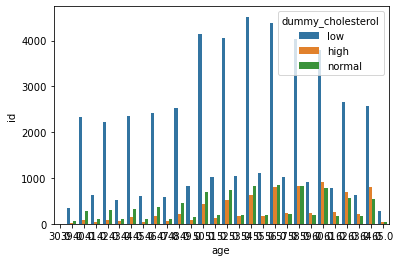

In [31]:
sns.barplot(data=cardio_age_cholesterol, x="age", y="id", hue="dummy_cholesterol")
plt.rcParams['figure.figsize']=20,20

Как распределена переменная BMI? Есть ли выбросы

In [32]:
cardio.BMI.value_counts()

24.0     7893
25.0     6874
26.0     6070
23.0     5953
27.0     5324
         ... 
9.0         1
278.0       1
149.0       1
66.0        1
188.0       1
Name: BMI, Length: 96, dtype: int64

<AxesSubplot:>

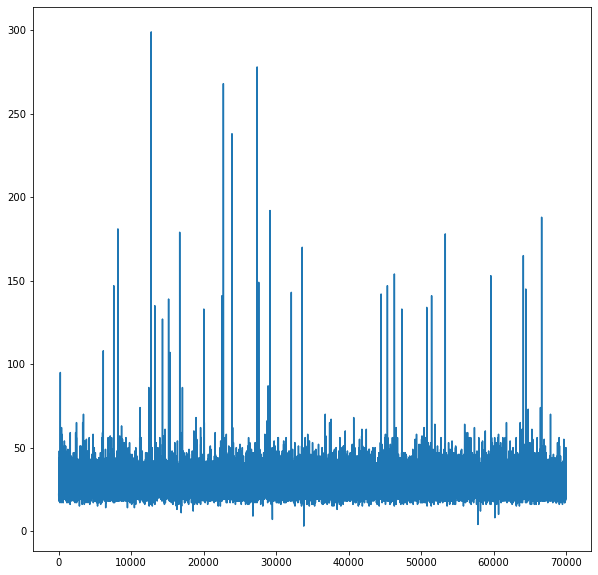

In [33]:
cardio.BMI.plot(figsize=(10,10))

<AxesSubplot:xlabel='id', ylabel='BMI'>

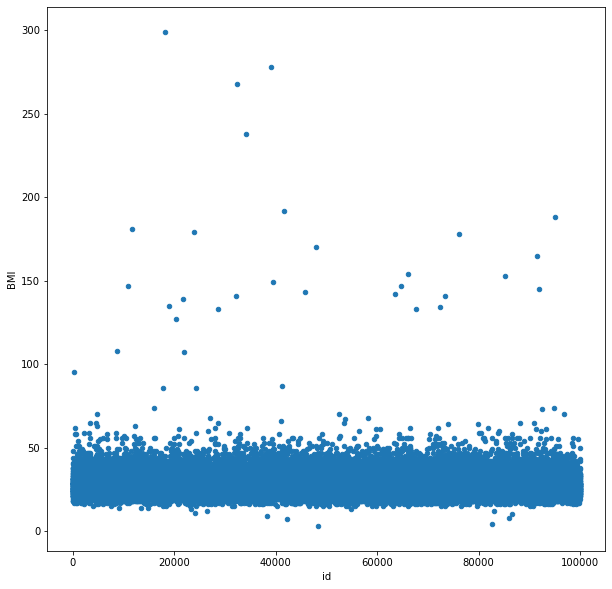

In [34]:
cardio.plot.scatter(x="id", y="BMI", figsize=(10,10))

In [93]:
#на мой взгляд значения выше 80 можно считать выбросами, можно на них посмотреть
cardio_BMI_higher=cardio[cardio['BMI']>=80]

In [94]:
cardio_BMI_higher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 224 to 66643
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               33 non-null     int64  
 1   age                              33 non-null     float64
 2   gender                           33 non-null     int64  
 3   height                           33 non-null     int64  
 4   weight                           33 non-null     float64
 5   ap_hi                            33 non-null     int64  
 6   ap_lo                            33 non-null     int64  
 7   cholesterol                      33 non-null     int64  
 8   gluc                             33 non-null     int64  
 9   smoke                            33 non-null     int64  
 10  alco                             33 non-null     int64  
 11  active                           33 non-null     int64  
 12  cardio             

In [95]:
cardio_BMI_higher
#становится видно, что вопрос в росте

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,blood_pressure_diastolic_higher,dummy_cholesterol
224,309,60.0,2,76,55.0,120,80,1,1,0,0,1,0,95.0,False,low
6153,8757,58.0,1,122,161.0,120,80,1,1,0,0,1,1,108.0,False,low
7598,10843,40.0,2,70,72.0,120,8,1,1,0,0,1,0,147.0,False,low
8171,11662,48.0,2,97,170.0,160,100,1,1,1,0,1,1,181.0,False,low
12435,17757,60.0,1,137,161.0,150,100,2,1,0,0,0,1,86.0,False,normal
12770,18218,54.0,1,75,168.0,120,80,1,1,1,0,1,1,299.0,False,low
13265,18928,62.0,2,71,68.0,120,80,3,1,0,0,1,0,135.0,False,high
14323,20459,60.0,1,67,57.0,120,90,1,1,0,0,1,1,127.0,False,low
15167,21686,43.0,1,70,68.0,120,80,1,1,0,0,0,0,139.0,False,low
15366,21958,48.0,1,125,167.0,180,90,1,2,0,0,1,1,107.0,False,low


<AxesSubplot:xlabel='id', ylabel='height'>

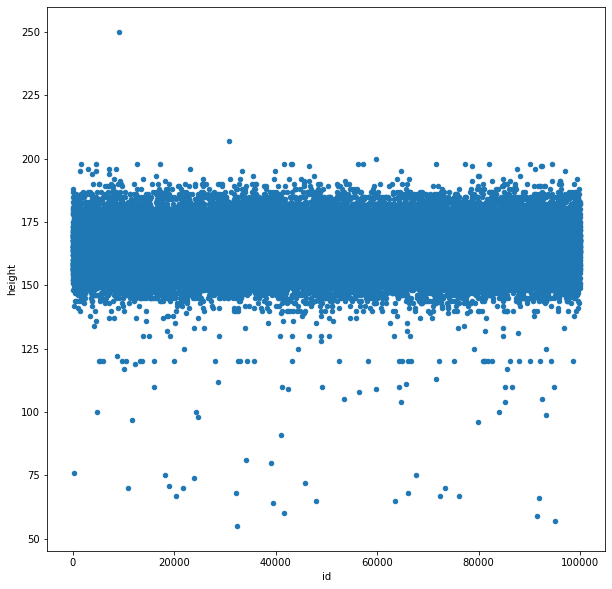

In [96]:
cardio.plot.scatter(x="id", y="height", figsize=(10,10))
#можно сказать даже что это выбросы по росту

<AxesSubplot:xlabel='id', ylabel='weight'>

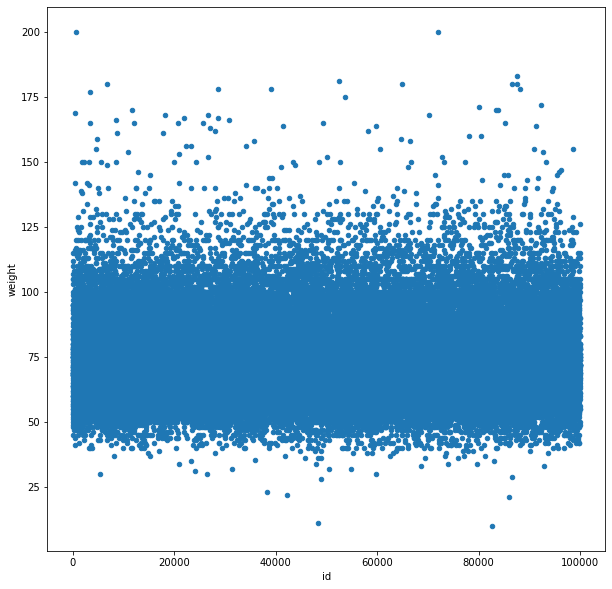

In [97]:
cardio.plot.scatter(x="id", y="weight", figsize=(10,10))

Как соотносятся ИМТ и наличие ССЗ? Придумайте подходящую визуализацию.

In [98]:
cardio_BMI_cardio=cardio[cardio['BMI']<=60]
cardio_BMI_cardio=cardio_BMI_cardio[cardio_BMI_cardio['BMI']>=15]
#cardio_BMI_cardio=cardio_BMI_cardio[cardio_BMI_cardio['cardio']==1]
cardio_BMI_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,blood_pressure_diastolic_higher,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,False,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,35.0,False,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,24.0,False,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,29.0,False,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,False,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,27.0,False,low
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.0,False,normal
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.0,False,high
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.0,False,low


In [99]:
cardio_BMI_cardio_3=pd.crosstab(cardio_BMI_cardio.BMI, cardio_BMI_cardio.cardio)
cardio_BMI_cardio_3

cardio,0,1
BMI,,
15.0,19,8
16.0,57,21
17.0,114,38
18.0,273,106
19.0,540,196
20.0,845,363
21.0,1569,867
22.0,2375,1394
23.0,3513,2440


<Figure size 1440x1280 with 0 Axes>

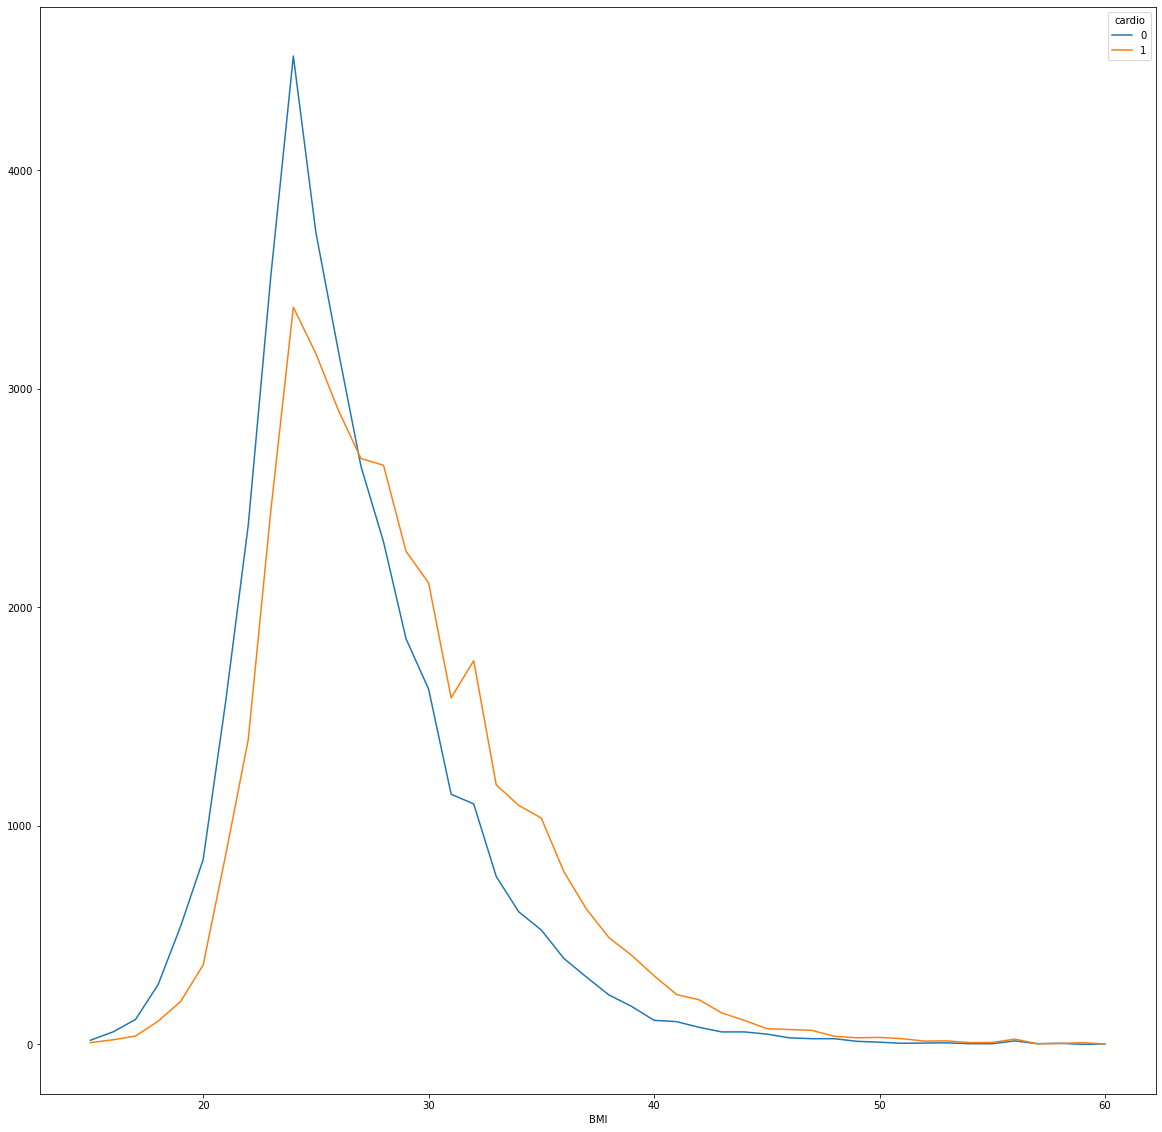

In [100]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
cardio_BMI_cardio_3.plot()
plt.show()

Вывод, который можно сделать по данному графику. Количество наличия кардиологического заболевания на уровне индекса массы тела - приблизительно от 15 до 27 ниже, чем количество отсутствия ССЗ, после уровня приблизитеьлно 27 количество наличия и отсутствия ССЗ приравнивается и дальше, наличие ССЗ увеличивается относительно отсутствия. Смотрим линию пересечения оранжевой линии и голубой на графике. Также это видно и в таблице выше. Можно посчитать относительные значения (в процентном соотношении наличие/отсутствие ССЗ)

In [101]:
cardio_BMI_cardio_3['share_0']=round(100-(cardio_BMI_cardio_3[0]/(cardio_BMI_cardio_3[0]+cardio_BMI_cardio_3[1])*100), 2)
cardio_BMI_cardio_3['share_1']=round(100-(cardio_BMI_cardio_3[1]/(cardio_BMI_cardio_3[0]+cardio_BMI_cardio_3[1])*100), 2)

In [104]:
cardio_BMI_cardio_3['status']=cardio_BMI_cardio_3['share_0']>cardio_BMI_cardio_3['share_1']
cardio_BMI_cardio_3

cardio,0,1,share_0,share_1,status
BMI,,,,,
15.0,19,8,29.63,70.37,False
16.0,57,21,26.92,73.08,False
17.0,114,38,25.00,75.00,False
18.0,273,106,27.97,72.03,False
19.0,540,196,26.63,73.37,False
20.0,845,363,30.05,69.95,False
21.0,1569,867,35.59,64.41,False
22.0,2375,1394,36.99,63.01,False
23.0,3513,2440,40.99,59.01,False


In [105]:
cardio_BMI_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,blood_pressure_diastolic_higher,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,False,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,35.0,False,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,24.0,False,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,29.0,False,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,False,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,27.0,False,low
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.0,False,normal
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.0,False,high
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.0,False,low


На сайте Европейского общества кардиологов представлена шкала SCORE. Она используется для расчёта риска смерти от сердечно-сосудистых заболеваний в ближайшие 10 лет.

Рассмотрим верхний правый прямоугольник, который показывает подмножество курящих мужчин в возрасте от 60 до 65 лет (значения по вертикальной оси на рисунке представляют верхнюю границу).

Мы видим значение 9 в левом нижнем углу прямоугольника и 47 в правом верхнем углу. Это означает, что для людей этой возрастной группы с систолическим давлением менее 120 и низким уровнем холестерина риск сердечно-сосудистых заболеваний оценивается примерно в 5 раз ниже, чем для людей с давлением в интервале [160, 180] и высоким уровнем холестерина.

Вычислите аналогичное соотношение для наших данных.

Попробуем создать примера расчета уровня риска ССЗ согласно имеющимся данным на основании таких параметров:
1) Индекс массы тела
2) Курение
3) Наличие физической нагрузки
4) Уровня холестерина
5) Давление

Сначала создадим ранговые/номинальные переменные, которым присвоим баллы, повышающие или снижающие (условно) риск ССЗ. Используя очевидные знания о том, что чем выше уровень холестерина - тем выше риск заболевания, или о том, что курение усугубляет риск ССЗ, так же как и отсутствие физической нагрузки или высокое давление. Чем выше получится итоговый балл, тем выше уровень риска СС-заболевания

1) Индекс массы тела:
    ниже 27 - normal - 0 баллов
    выше 27 - high - 1 балл
    
2) Курение
 0 - 0 баллов
 1 - 1 балл
 
3) Наличие физической нагрузки
 0 - 1 балл
 1 - 0 балл
 
4) Уровень холестерина
low - 0 баллов
normal - 1 балл
high - 1 балл

 
5) Давление 
120 и ниже - 0 баллов
120-140 - 0.5 баллов
140-160 - 1 балл
160-180 - 2 балла
180 и выше - 3 балла

6) Возраст

In [145]:
#преобразуем "индекс массы тела"
cardio_BMI_cardio['BMI_score'] = np.where(cardio_BMI_cardio['BMI'] < 27, 0, 1)

In [131]:
#преобразуем давление
cardio_BMI_cardio['pressure_score'] = np.where(cardio_BMI_cardio['ap_hi'] < 120, 0, np.where((cardio_BMI_cardio['ap_hi']<140), 0.5, np.where(((cardio_BMI_cardio['ap_hi']<160)), 1, np.where((((cardio_BMI_cardio['ap_hi']<180))), 2, 3))))

In [135]:
#преобразуем уровень холестерина
cardio_BMI_cardio['cholesterol_score'] = np.where(cardio_BMI_cardio['cholesterol'] == 1, 0, np.where((cardio_BMI_cardio['cholesterol']==2), 0, 1)) 

In [139]:
#преобразуем КУРЕНИЕ. Можно конечно оставить, как есть и счтать по колонке в исходных данных, но чтобы не запутаться все равно создает отдельный столбец
cardio_BMI_cardio['smoke_score'] = np.where(cardio_BMI_cardio['smoke'] == 1, 1, 0)

In [141]:
#преобразуем "физическую активность"
cardio_BMI_cardio['active_score'] = np.where(cardio_BMI_cardio['active'] == 1, 0, 1)

In [147]:
#посчитаем итоговое количество баллов по риску
cardio_BMI_cardio['risk_score']=cardio_BMI_cardio['active_score']+cardio_BMI_cardio['smoke_score']+cardio_BMI_cardio['cholesterol_score']+cardio_BMI_cardio['pressure_score']+cardio_BMI_cardio['BMI_score']

In [148]:
cardio_BMI_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,cardio,BMI,blood_pressure_diastolic_higher,dummy_cholesterol,pressure_score,cholesterol_score,smoke_score,active_score,BMI_score,risk_score
0,0,50.0,2,168,62.0,110,80,1,1,0,...,0,22.0,False,low,0.0,0,0,0,0,0.0
1,1,55.0,1,156,85.0,140,90,3,1,0,...,1,35.0,False,high,1.0,1,0,0,1,3.0
2,2,52.0,1,165,64.0,130,70,3,1,0,...,1,24.0,False,high,0.5,1,0,1,0,2.5
3,3,48.0,2,169,82.0,150,100,1,1,0,...,1,29.0,False,low,1.0,0,0,0,1,2.0
4,4,48.0,1,156,56.0,100,60,1,1,0,...,0,23.0,False,low,0.0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,...,0,27.0,False,low,0.5,0,1,0,1,2.5
69996,99995,62.0,1,158,126.0,140,90,2,2,0,...,1,50.0,False,normal,1.0,0,0,0,1,2.0
69997,99996,52.0,2,183,105.0,180,90,3,1,0,...,1,31.0,False,high,3.0,1,0,1,1,6.0
69998,99998,61.0,1,163,72.0,135,80,1,2,0,...,1,27.0,False,low,0.5,0,0,1,1,2.5


In [174]:
#подчистим таблицу от лишних столбцов для наглядности
cardio_BMI_cardio_risk=cardio_BMI_cardio.drop(columns = ['gender', 'height', 'weight', 'ap_lo', 'gluc', 'alco', 'blood_pressure_diastolic_higher', 'dummy_cholesterol'],axis = 1)
cardio_BMI_cardio_risk

,id,age,ap_hi,cholesterol,smoke,active,cardio,BMI,pressure_score,cholesterol_score,smoke_score,active_score,BMI_score,risk_score
0,0,50.0,110,1,0,1,0,22.0,0.0,0,0,0,0,0.0
1,1,55.0,140,3,0,1,1,35.0,1.0,1,0,0,1,3.0
2,2,52.0,130,3,0,0,1,24.0,0.5,1,0,1,0,2.5
3,3,48.0,150,1,0,1,1,29.0,1.0,0,0,0,1,2.0
4,4,48.0,100,1,0,0,0,23.0,0.0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,120,1,1,1,0,27.0,0.5,0,1,0,1,2.5
69996,99995,62.0,140,2,0,1,1,50.0,1.0,0,0,0,1,2.0
69997,99996,52.0,180,3,0,0,1,31.0,3.0,1,0,1,1,6.0
69998,99998,61.0,135,1,0,0,1,27.0,0.5,0,0,1,1,2.5


In [176]:
#количество людей с разным уровнем риска
cardio_BMI_cardio_risk_plot=cardio_BMI_cardio_risk.groupby('risk_score').agg({'id': 'count'})
cardio_BMI_cardio_risk_plot

,id
risk_score,
0.0,5919
0.5,13728
1.0,8747
1.5,16832
2.0,9194
2.5,6196
3.0,5807
3.5,733
4.0,2172


In [177]:
#уровень риска vs наличие ССЗ
cardio_BMI_cardio_risk_cardio=pd.crosstab(cardio_BMI_cardio_risk.cardio, cardio_BMI_cardio_risk.risk_score)
cardio_BMI_cardio_risk_cardio

risk_score,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0,7.0
cardio,,,,,,,,,,,,,
0,4822,9083,4653,9863,2226,2738,981,222,311,7,67,11,0
1,1097,4645,4094,6969,6968,3458,4826,511,1861,30,412,63,4
